## Introduction

The purpose of this notebook is to develop a neural network-based image classification algorithm to classify handwritten digits. The goal of this is to build a neural network that can accurately distinguish between two specific digits, 0 and 1, from the widely-used MNIST dataset.

The data used in this project comes from the MNIST dataset, a benchmark dataset in the field of machine learning and computer vision. MNIST stands for Modified National Institute of Standards and Technology database and contains a large collection of handwritten digits. Each image is 28x28 pixels, and labeled with the corresponding digit it represents.

## Import Libraries

In [9]:
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import layers, regularizers, Sequential
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Load Data


In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Train/Test Data

In [4]:
train_filter = np.where((train_labels == 0) | (train_labels == 1))
test_filter = np.where((test_labels == 0) | (test_labels == 1))

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Normalize the images to [0, 1] range
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images (28x28 to 784)
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Print the shape of the data
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')

Train images shape: (12665, 784)
Test images shape: (2115, 784)


In [5]:
# Define the Neural Network Architecture
def define_model(units, num_layers, activation, lr, l2):
    model_layers = [
        layers.Dense(units, activation=activation, kernel_regularizer=regularizers.L2(l2=l2), kernel_initializer=tf.keras.initializers.HeNormal())
        ] * num_layers  # These are the main hidden layers
    model_layers += [layers.Dense(1)]  # This is the output layer for binary classification
    model = Sequential(model_layers)  # This just stacks all our layers on top of each other
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=Adam(learning_rate=lr))  # This is a good loss/penalty function to use for binary classification

    return model

# Instantiate the neural network
model = define_model(units=128, num_layers=2, activation='relu', lr=0.001, l2=0.001)


In [6]:
# Training the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
198/198 [==============================] - 7s 14ms/step - loss: 0.1195 - accuracy: 0.9888 - val_loss: 0.0434 - val_accuracy: 0.9995
Epoch 2/10
198/198 [==============================] - 3s 14ms/step - loss: 0.0318 - accuracy: 0.9985 - val_loss: 0.0204 - val_accuracy: 0.9991
Epoch 3/10
198/198 [==============================] - 3s 13ms/step - loss: 0.0169 - accuracy: 0.9987 - val_loss: 0.0172 - val_accuracy: 0.9972
Epoch 4/10
198/198 [==============================] - 3s 17ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.0105 - val_accuracy: 0.9991
Epoch 5/10
198/198 [==============================] - 3s 14ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0091 - val_accuracy: 0.9991
Epoch 6/10
198/198 [==============================] - 3s 14ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0098 - val_accuracy: 0.9976
Epoch 7/10
198/198 [==============================] - 2s 8ms/step - loss: 0.0087 - accuracy: 0.9990 - val_loss: 0.0077 - val_accuracy: 0.9991


## Analysis

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


67/67 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9995
Test accuracy: 99.95%


In [10]:
# Generate Confusion Matrix
y_pred = (model.predict(test_images) > 0.5).astype("int32")
cm = confusion_matrix(test_labels, y_pred)
accuracy = sum(y_pred.flatten() == test_labels) / len(test_labels)
print(f'Confusion Matrix Accuracy: {accuracy * 100:.2f}%')
print(cm)

67/67 [==============================] - 0s 4ms/step
Confusion Matrix Accuracy: 99.95%
[[ 979    1]
 [   0 1135]]


1/1 [==============================] - 0s 32ms/step


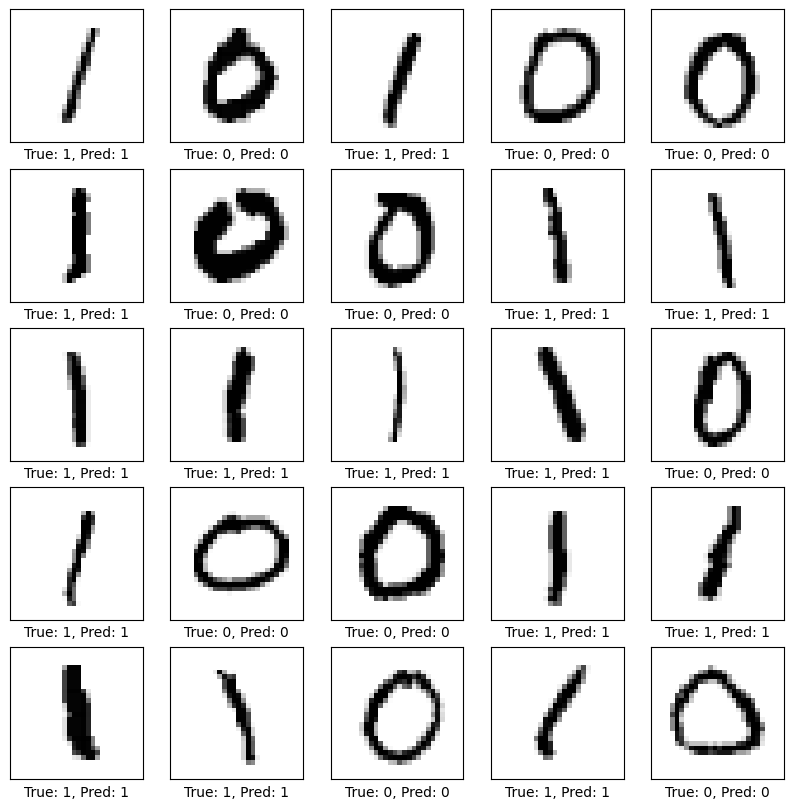

In [11]:
# Visualize predictions
def visualize_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f'True: {labels[i]}, Pred: {int(predictions[i])}')
    plt.show()

# Get predictions
predictions = model.predict(test_images[:25])
predictions = tf.round(tf.sigmoid(predictions))
visualize_predictions(test_images, test_labels, predictions)


## Conclusion

In conclusion, neural network-based image classification algorithm capable of distinguishing between two specific digits, 0 and 1, from the MNIST dataset was successfully developed. Through careful data processing, model definition, and training, we achieved high accuracy in classifying the handwritten digits.